In [1]:
# Description : The program is using a neural network called Long Term Short Memory or what is commonly known as (LSTM) This is widely used for sequence prediction problemns and have proven to be widely effective 
#               This is program will be predicting the closing priice of a Corporation (Apple Inc. ) Last 60 day stock price 

In [1]:
#Importing the libraries
import math 
import pandas_datareader as web
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Getting the Stock Quote 

df = web.DataReader("AAPL", data_source = 'yahoo', start = '2012-01-01', end = '2021-03-22')

#Showing the Data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2021-03-16,127.220001,124.720001,125.699997,125.570000,114740000.0,125.570000
2021-03-17,125.860001,122.339996,124.050003,124.760002,111437500.0,124.760002
2021-03-18,123.180000,120.320000,122.879997,120.529999,121229700.0,120.529999


In [3]:
#To Get the number of rows and column in the data set
df.shape

(2319, 6)

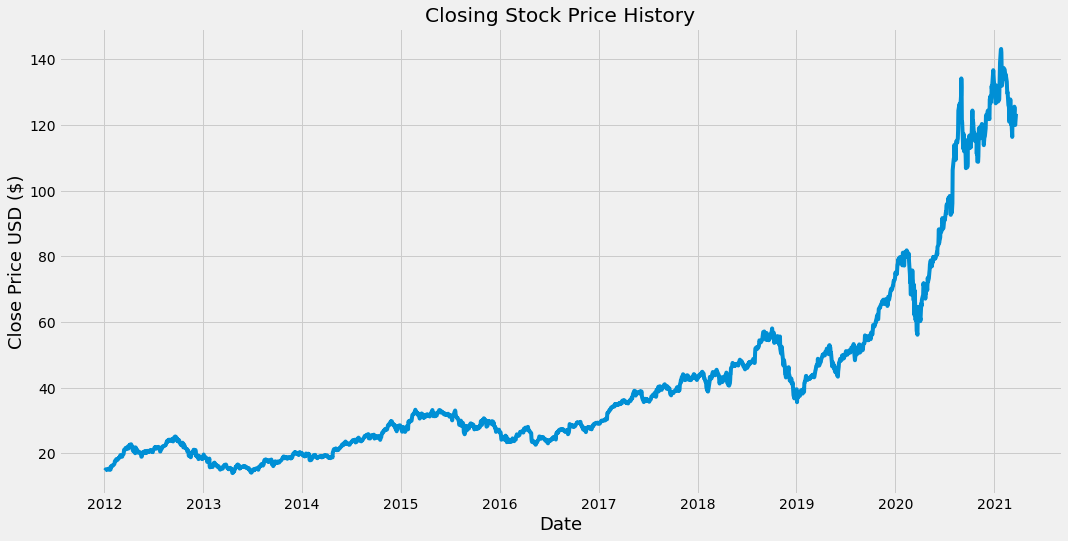

In [4]:
#Visualizing the closing price history
plt.figure(figsize=(16,8))
plt.title("Closing Stock Price History")
plt.plot(df['Close']);
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()


In [5]:
#Creating a new data frame with only close column 
data = df.filter(['Close'])

#converting the data frame to numpy array

dataset = data.values 

#getting the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * 0.8)   #this *0.8 will be giving us 80% of the dataset

training_data_len 

1856

In [6]:
#Scaling the data   -> It is always advantageous for standardization. It is applied to independent variables or features of data.Preprocessing of data is a good practice. Helps in normalization of data within a particular range. Also helps in speeding up the calculations in an algorithm.

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.82486211],
       [0.82068294],
       [0.8469962 ]])

In [7]:
#Creating the training Data Set 

#creating the scaled training data set

train_data= scaled_data[0:training_data_len, :]

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00

In [8]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train),np.array(y_train)


In [9]:
#Reshaping the data -> Why? -> LSTM expects the input to be 3D in the form of number of samples, number of time steps and number of features. currently the data is 2D (rows and columns only)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1)) #  (no. of samples,no. of time steps, no. of features(i.e = 1 in our case -> Closing Price))
x_train.shape

(1796, 60, 1)

In [13]:
# Building the LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
# Compiling the Model

model.compile(optimizer = 'adam', loss ='mean_squared_error') 
# optimizer is used to improve upon the loss function & loss function is used to measure how well did the model did on the trained data 



In [15]:
#Training the model 
model.fit(x_train,y_train, batch_size = 1, epochs = 1) #batch size -> total number of training samples present in a single batch 

#Epochs -> the number times that the learning algorithm will work through the entire training dataset

1796/1796 [==============================] - 129s 72ms/step - loss: 2.5437e-04


In [16]:
#Creating the test data set

#Create a new array containing the scaled values from index 1543 to 2003
# this will be the scaled testing data test 

test_data = scaled_data[training_data_len - 60:, :]

#Creating the data sets -> x_test and y_test

x_test= []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [17]:
#Coverting the data to numpy array

x_test = np.array(x_test)

#reshape -> because LSTM expects 3D shape

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))


In [18]:
# Getting the model predicted Price Values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) 

# we want predictions to contain the same values as our y_test dataset 

In [19]:
# Get the root mean squared error (RMSE) -> Gives a good measure of how accurate the model has performed 
# The lower the RMSE -> the better

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.625538061813453

<ipython-input-22-1c7b9901fc29>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


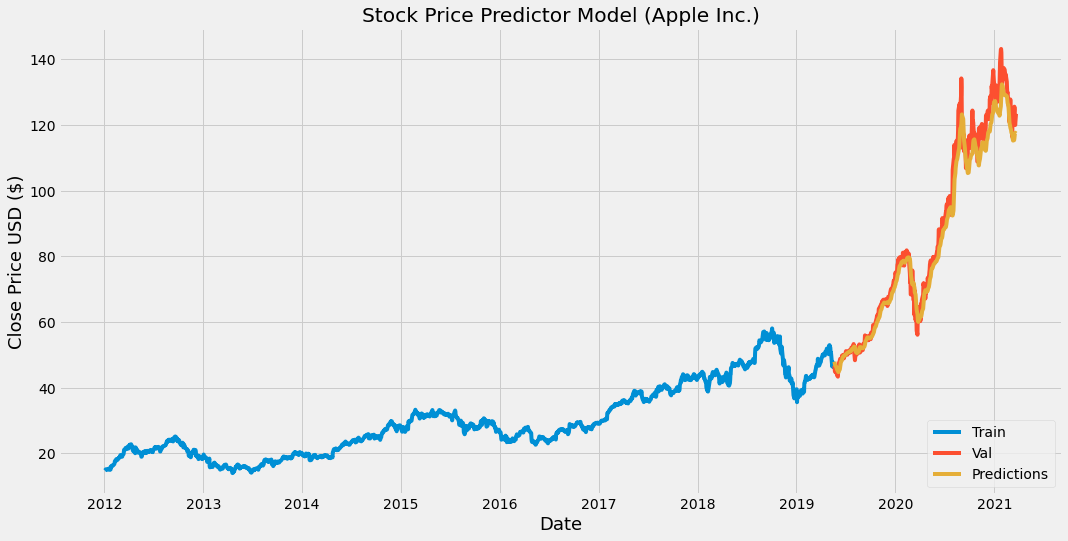

In [22]:
#Plotting the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize 
plt.figure(figsize =(16,8)) 
plt.title('Stock Price Predictor Model (Apple Inc.)')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize =18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val', 'Predictions'], loc= 'lower right')
plt.show()

In [20]:
#Getting the quote 
apple_quote = web.DataReader('AAPL', data_source= 'yahoo', start = '2012-01-01', end = '2021-03-22')
#New dataframe 
new_df = apple_quote.filter(['Close'])

#Get the last 60 days closing price values and convert the dataframe to an array 

last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1

last_60_days_scaled = scaler.transform(last_60_days)


#Creating an empty list

X_test=[]

#Appending the past 60 days

X_test.append(last_60_days_scaled)

#Convert the X_test dataset to a numpy array

X_test = np.array(X_test)

#Reshape the data 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

#Getting the predicted Scaled price

predicted_price = model.predict(X_test)

#Removing the scaling

predicted_price = scaler.inverse_transform(predicted_price)
print("\n Predicted Price by our model")
print(predicted_price)


 Predicted Price by our model
[[117.44235]]


In [68]:
apple_quote2 = web.DataReader('AAPL', data_source= 'yahoo', start = '2021-03-22', end = '2021-03-22')
print('\n Actual Stock Price :')
print(apple_quote2['Close'])


 Actual Stock Price :
Date
2021-03-22    123.389999
Name: Close, dtype: float64
